In [42]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import zipfile
with zipfile.ZipFile("titanic.zip","r") as zip_ref:
    zip_ref.extractall("titanic")

In [2]:
df_train = pd.read_csv('titanic/train.csv')


In [3]:
df_test = pd.read_csv('titanic/test.csv')

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Description
#### Variable	Definition	Key
__survival__	Survival	0 = No, 1 = Yes

**pclass**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
**sex**	Sex	
**Age**	Age in years	
**sibsp**	# of siblings / spouses aboard the Titanic	
**parch**	# of parents / children aboard the Titanic	
**ticket**	Ticket number	
**fare**	Passenger fare	
**cabin**	Cabin number	
**embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**parch**: The dataset defines family relations in this way...
__Parent__ = mother, father
__Parent__ = mother, father
__Child__ = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

__pclass__: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking for missing values

In [13]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


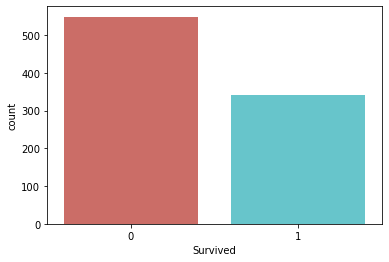

In [14]:
# How many people Survived 
sb.countplot(x ='Survived', data = df_train, palette='hls' )
print(df_train.Survived.value_counts())

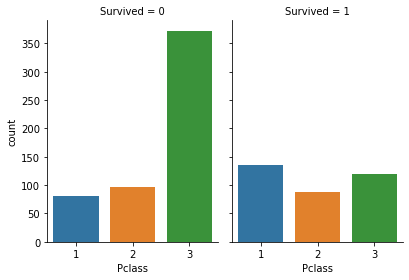

In [8]:
g = sb.catplot(x="Pclass", col="Survived", data=df_train, kind="count",  height=4, aspect=.7)

In [17]:
grouped_train = df_train.groupby(['Survived','Pclass']).count()

In [18]:
grouped_train

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass                                                            
0        1                80    80   80   64     80     80      80    80   
         2                97    97   97   90     97     97      97    97   
         3               372   372  372  270    372    372     372   372   
1        1               136   136  136  122    136    136     136   136   
         2                87    87   87   83     87     87      87    87   
         3               119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Survived Pclass                   
0        1          59        80  
         2           3        97  
         3           6       372  
1        1         117       134  
         2          13        87  
         3           6       119

In [35]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

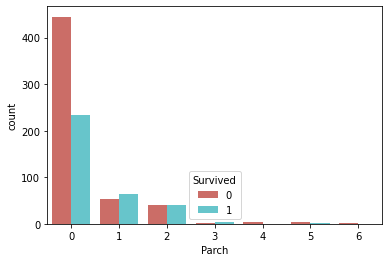

In [13]:

sb.countplot(x="Parch" ,hue ='Survived', data=df_train, palette='hls')


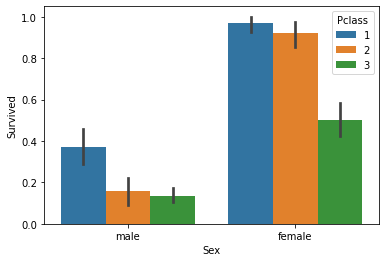

In [45]:
sb.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train)

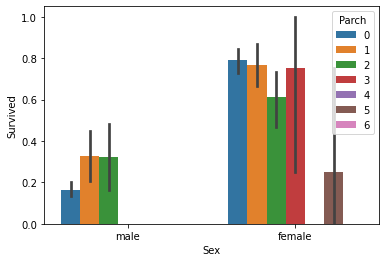

In [46]:
sb.barplot(x="Sex", y="Survived", hue="Parch", data=df_train)

In [28]:
# about 74% of the Survival is among female
titanic_grouped = df_train.pivot_table(df_train, index= 'Sex',aggfunc=np.mean )
titanic_grouped

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


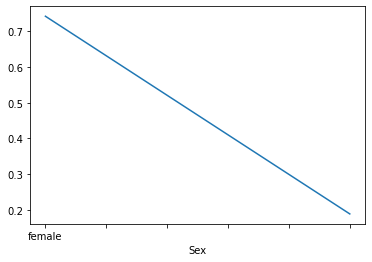

In [26]:
titanic_grouped.Survived.plot()

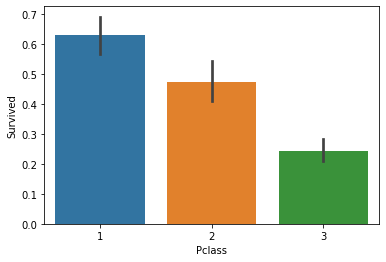

In [27]:
#checking Pclass and survival rate
sb.barplot(x='Pclass', y='Survived', data=df_train)

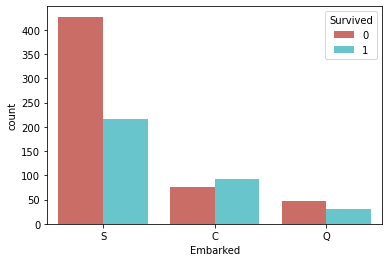

In [51]:
#checking Embarked column vs survived
sb.countplot(x= 'Embarked', hue= 'Survived', data= df_train, palette='hls')

In [85]:
# checking average age of the survived 
df_pivot =  pd.pivot_table(df_train, values=['Age','Survived'] ,index=['Sex'], aggfunc=np.mean)

In [86]:
df_pivot

,Age,Survived
Sex,,
female,27.788462,0.740385
male,30.140676,0.188908


In [93]:
df_pivoted= pd.pivot(df_train, columns = 'Sex', values='Age' )

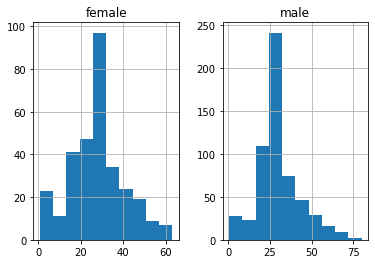

In [101]:
df_pivoted.hist(figsize=(6,4));

# Checking Test dataset

In [145]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [146]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Checking missing values in test dataset

In [147]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Cleaning Data
### Filling in Missing values in age column in both Datasets with the median Number

In [4]:
imput_value = df_train['Age'].median()

df_train['Age'] = df_train['Age'].fillna(imput_value)
df_test['Age']  = df_test['Age'].fillna(imput_value)


In [5]:
df_train.Age.isnull().sum()

0

In [6]:
df_test.Age.isnull().sum()

0

#### Adding a column to both data Sets separating female from male

In [7]:
df_train['isfemale'] = (df_train['Sex'] == 'female').astype(int)
df_test['isfemale']  =(df_test['Sex'] == 'female').astype(int)

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isfemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
#Dropping name, sex, ticket and cabin columns in train dataset
titanic_data = df_train.drop(['Name','Sex','Ticket','Cabin' ], axis = 1)


In [10]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,isfemale
0,1,0,3,22.0,1,0,7.2500,S,0
1,2,1,1,38.0,1,0,71.2833,C,1
2,3,1,3,26.0,0,0,7.9250,S,1
3,4,1,1,35.0,1,0,53.1000,S,1
4,5,0,3,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,0
887,888,1,1,19.0,0,0,30.0000,S,1
888,889,0,3,28.0,1,2,23.4500,S,1
889,890,1,1,26.0,0,0,30.0000,C,0


In [11]:
# dropping Embarked missing values 
titanic_data.dropna(inplace = True)

In [12]:
len(titanic_data)

889

In [13]:
#Test
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
isfemale       0
dtype: int64

#### Turning 'Embarked' column into dummies variables for model preparation

In [14]:
train_dmy = pd.get_dummies(titanic_data['Embarked'])

In [70]:
train_dmy

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [15]:
# concatenate the new dummy variables into the new data_set 
clean_train = pd.concat([titanic_data, train_dmy], axis = 1, verify_integrity=True )

In [16]:
clean_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,isfemale,C,Q,S
0,1,0,3,22.0,1,0,7.2500,S,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,S,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,S,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,S,1,0,0,1
888,889,0,3,28.0,1,2,23.4500,S,1,0,0,1
889,890,1,1,26.0,0,0,30.0000,C,0,1,0,0


# Deploying ML models

In [17]:
features = ['Pclass', 'Age', 'Parch', 'isfemale', 'C', 'Q', 'S']

In [18]:
X = clean_train[features].values
X.shape

(889, 7)

In [19]:
y =clean_train.Survived.values 
y.shape

(889,)

## Train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [22]:
#Scaling the Data
scaler = StandardScaler()

# Apply transform to both the training set and the test set.
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic RegressionCV

In [23]:
model_log = LogisticRegressionCV(10) 
model_log.fit(X_train, y_train)

C:\Users\Amira\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass Cs=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegressionCV()

In [24]:
scores = cross_val_score(model_log, X_train, y_train, cv= 4)

In [25]:
scores

array([0.80239521, 0.82035928, 0.81325301, 0.80120482])

In [26]:
model_log.score(X_test, y_test)

0.7668161434977578

# G Naive Bayes 


In [27]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb.score(X_test,y_test)

0.7533632286995515

In [29]:
scores = cross_val_score(gnb, X_train, y_train, cv= 4)
scores

array([0.79041916, 0.77245509, 0.74698795, 0.73493976])

# Random Forrest

In [30]:
model_rand = RandomForestClassifier(n_estimators=100, random_state=42)

model_rand.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
scores = cross_val_score(model_rand, X, y, cv= 4)
scores

array([0.73542601, 0.7972973 , 0.79279279, 0.78828829])

In [32]:
model_rand.score(X_test, y_test)

0.7309417040358744

#  Gradient Tree Boosting

In [33]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [34]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [35]:
clf.score(X_test, y_test)

0.7623318385650224

In [36]:
scores = cross_val_score(clf, X_train, y_train, cv= 4)
scores

array([0.77844311, 0.81437126, 0.8313253 , 0.80120482])

# KNeighborsClassifier

In [38]:
Knc = KNeighborsClassifier(n_neighbors=5) 

In [39]:
Knc.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
Knc.score(X_test, y_test)

0.7668161434977578

In [41]:
scores = cross_val_score(Knc, X_train, y_train, cv= 4)
scores

array([0.77245509, 0.82035928, 0.8313253 , 0.80722892])

# SVM

In [43]:
svm_model = svm.SVC()

In [44]:
svm_model.fit(X_train, y_train)

SVC()

In [45]:
scores = cross_val_score(svm_model, X_train, y_train, cv= 4)
scores

array([0.84431138, 0.8502994 , 0.84939759, 0.8253012 ])

In [46]:
svm_model.score(X_train, y_train)

0.8423423423423423

# Preparing Test DF for predicting

In [47]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isfemale
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [48]:
len(df_test)

418

In [49]:
test_dummy = pd.get_dummies(df_test['Embarked'])

In [50]:
test_dummy

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [51]:
test_clean = pd.concat([df_test, test_dummy], axis = 1, verify_integrity=True)

In [52]:
test_clean

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isfemale,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,0,1


In [195]:
test_clean[['Pclass', 'Age', 'Parch', 'isfemale', 'C', 'Q', 'S']]

,Pclass,Age,Parch,isfemale,C,Q,S
0,3,34.5,0,0,0,1,0
1,3,47.0,0,1,0,0,1
2,2,62.0,0,0,0,1,0
3,3,27.0,0,0,0,0,1
4,3,22.0,1,1,0,0,1
...,...,...,...,...,...,...,...
413,3,28.0,0,0,0,0,1
414,1,39.0,0,1,1,0,0
415,3,38.5,0,0,0,0,1
416,3,28.0,0,0,0,0,1


In [53]:
test = test_clean[['Pclass', 'Age', 'Parch', 'isfemale', 'C', 'Q', 'S']].values

In [54]:
test.shape

(418, 7)

In [55]:
test

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 28. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 28. ,  1. , ...,  1. ,  0. ,  0. ]])

In [56]:
pred_scaled = scaler.fit_transform(test)

In [57]:
predictions = svm_model.predict(pred_scaled)

In [58]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
output = pd.DataFrame({'PassengerId': test_clean.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
#Saving data to CSV file
output.to_csv('my_submission.csv', index=False)